In [116]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [40]:
salary = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150] 

# среднее арифметическое
salary_mean = sum(salary) / len(salary)

# среднее квадратичное отклонение
salary_1 = 0
for i in range(0,len(salary)):
    salary_1 = salary_1 + (salary[i]-salary_mean)**2
salary_1 = salary_1 / len(salary)
salary_std = math.sqrt(salary_1)

# смещенная оценка дисперсии
salary_dis_s = 0
for i in range(0,len(salary)):
    salary_dis_s = salary_dis_s + (salary[i]-salary_mean)**2
salary_dis_s = salary_dis_s / len(salary)

# несмещенная оценка дисперсии
salary_dis_ns = 0
for i in range(0,len(salary)):
    salary_dis_ns = salary_dis_ns + (salary[i]-salary_mean)**2
salary_dis_ns = salary_dis_ns / (len(salary)-1)

salary_mean, salary_std, salary_dis_s, salary_dis_ns

(73.14285714285714, 46.20686994302874, 2135.074829931973, 2241.8285714285716)

In [41]:
sal = np.array(salary)
sal.mean(), sal.std(), sal.var(ddof=0), sal.var(ddof=1)

(73.14285714285714, 46.206869943028735, 2135.0748299319725, 2241.828571428571)

In [ ]:
Задача 2

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выборсы в выборке (используя для этого метод как при построении "усов" из boxplot).

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

In [123]:
salary = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150] 
salary = sorted(salary)

if len(salary) % 2 != 0:
    salary_median = salary[len(salary) // 2]
elif len(salary) % 2 == 0:
    salary_median = ((salary[len(salary) // 2] - 1) + (salary[len(salary) // 2]))/2

if len(salary) % 4 <= 1:
    salary_25 = salary[len(salary) // 4 - 1]
    salary_75 = salary[len(salary) - (len(salary) // 4)]
    salary_inter = (salary[len(salary) - (len(salary) // 4)]) - (salary[len(salary) // 4 - 1])  
    salary_inter_u = ((salary[len(salary) - (len(salary) // 4)]) - (salary[len(salary) // 4 - 1])) * 1.5
if len(salary) % 4 > 1:
    salary_25 = salary[len(salary) // 4]
    salary_75 = salary[len(salary) - (len(salary) // 4 + 1)]
    salary_inter = (salary[len(salary) - (len(salary) // 4 +1)]) - (salary[len(salary) // 4])
    salary_inter_u = ((salary[len(salary) - (len(salary) // 4 +1)]) - (salary[len(salary) // 4])) * 1.5

trash = []
for y in salary:
    if y < salary_25 - salary_inter_u:
        trash.append(y)
    if y > salary_75 + salary_inter_u:
        trash.append(y)
        
salary_median, salary_25, salary_75, salary_inter, salary_inter_u, trash

(70, 33, 89, 56, 84.0, [230])

In [71]:
sal = pd.DataFrame(salary)    
sal.median()
sal[0].median()

70.0

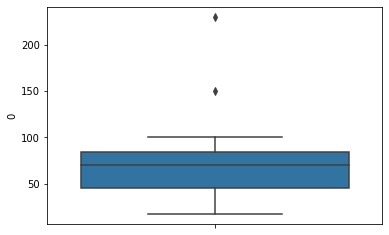

0      17
1      24
2      25
3      30
4      33
5      45
6      55
7      57
8      65
9      65
10     70
11     75
12     75
13     77
14     80
15     84
16     89
17     90
18    100
19    150
20    230
Name: 0, dtype: int64

In [121]:
sns.boxplot(sal[0], orient='v')
plt.show()
sal[0]

In [ ]:
Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило 
столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. 
Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую 
сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

In [4]:
# Вероятность обучения на факультетах А, В, С
P_A_1 = 0.25
P_A_2 = 0.25
P_A_3 = 0.5

# Вероятность сдать сессию 
P_B = 0.8 * 0.25 + 0.7 * 0.25 + 0.9 * 0.5

# Вероятность сдать сессию при условии обучения на определенном факультете указана в условии P(B|A)  
P_BA_1 = 0.8
P_BA_2 = 0.7
P_BA_3 = 0.9

# A
P_AB_1 = (P_BA_1 * P_A_1) / P_B 

# B
P_AB_2 = (P_BA_2 * P_A_2) / P_B 

# C
P_AB_3 = (P_BA_3 * P_A_3) / P_B 

P_AB_1, P_AB_2, P_AB_3


(0.24242424242424246, 0.21212121212121213, 0.5454545454545455)